In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

QUESTION 1

In [ ]:
data=pd.read_excel('/content/iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


QUESTION 2

In [ ]:
#Preprocessing - missing values,outlier detection,encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**filling missing values with median

In [ ]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**outlier detection

In [ ]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
num_cols=['SL', 'SW', 'PL', 'PW', 'Classification']

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

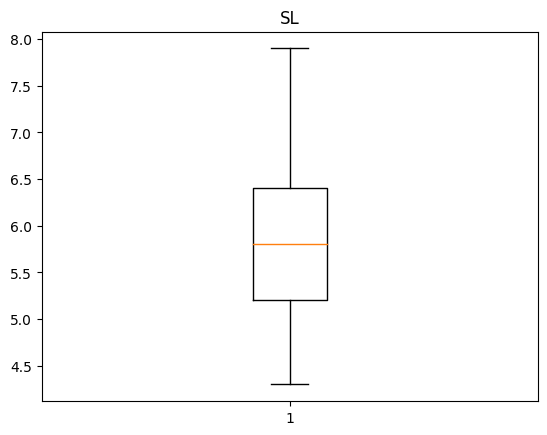

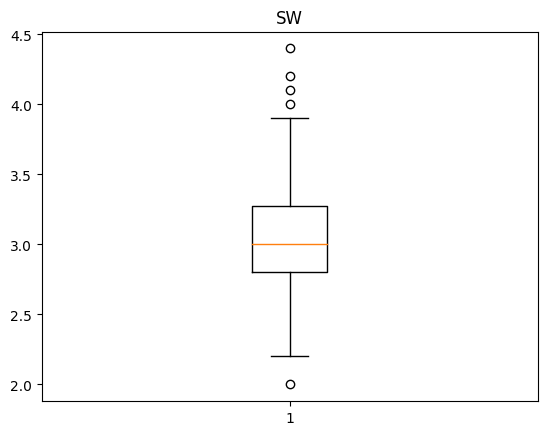

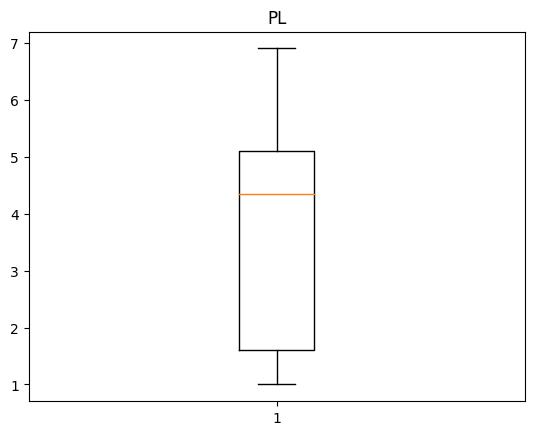

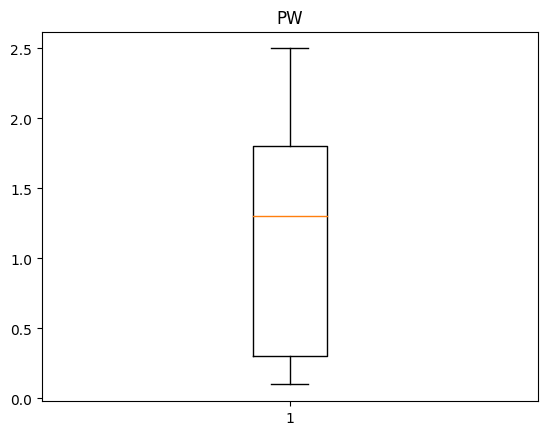

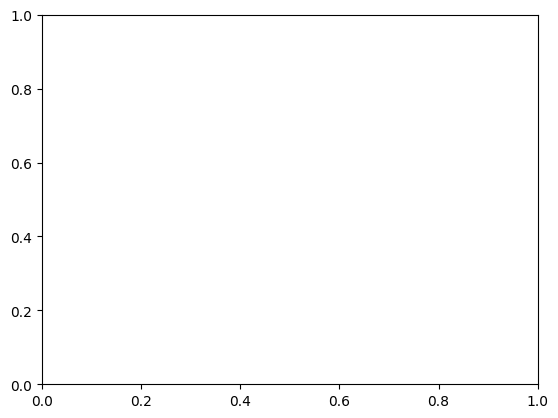

In [ ]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

**outlier in sw

In [ ]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')



In [ ]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 2.8
Q2 is 3.0
Q3 is 3.25


In [ ]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [ ]:
lower_limit=Q1-1.5*IQR
lower_limit

2.1249999999999996

In [ ]:
uper_limit=Q3+1.5*IQR
uper_limit

3.9250000000000003

In [ ]:
outlier=[]
for x in data['SW']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [ ]:
data['SW']=data['SW'].clip(lower=lower_limit,upper=uper_limit)

In [ ]:
outlier=[]
for x in data['SW']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

**ENCODING

In [ ]:
#label encoding

In [ ]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_en=LabelEncoder()


In [ ]:
data['Classification']=label_en.fit_transform(data['Classification'])

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**SCALING

In [ ]:
#standard scaler

In [ ]:
data2=data.drop('Classification',axis=1)
data2.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_sc=sc.fit_transform(data)

In [ ]:
x_sc=pd.DataFrame(x_sc)
x_sc.head()

,0,1,2,3,4
0,-0.915999,1.050213,-1.342455,-1.312977,-1.224745
1,-1.158345,-0.114892,-1.342455,-1.312977,-1.224745
2,NaN,0.351150,-1.399429,-1.312977,-1.224745
3,-1.521863,0.118129,-1.285481,-1.312977,-1.224745
4,-1.037172,1.283234,-1.342455,-1.312977,-1.224745


question 3

In [ ]:
#CLASSIFICATION- LOGISTIC REGRESSION

In [ ]:
data2=data.copy()
data2.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data2['Classification']=label_en.fit_transform(data2['Classification'])
data2.head()

In [ ]:
data2.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
#first split of data into dependent and independent

In [ ]:
y=data2['Classification']
x=data2.drop(['Classification'],axis=1)

In [ ]:
x.shape

(150, 4)

In [ ]:
#2 nd split of data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_prediction=log_model.predict(X_test)
y_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_prediction))


accuracy is 0.9666666666666667


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metrics_k=[]
neighbors=np.arange(1,15)

In [ ]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_prediction)
    metrics_k.append(acc)

metrics_k

[0.9333333333333333,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

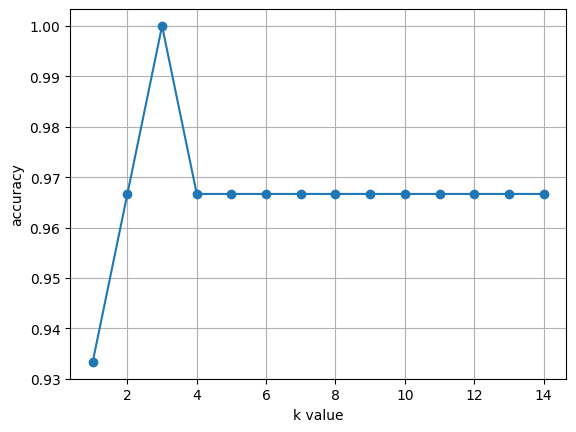

In [ ]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)
y_prediction=classifier.predict(X_test)
acc=accuracy_score(y_test,y_prediction)
print('accuracy is',accuracy_score(y_test,y_prediction))
acc=accuracy_score(y_test,y_prediction)

accuracy is 1.0


In [ ]:
#SVM

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
y_svm_prediction=svm_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_svm_prediction))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_svm_prediction))

accuracy is 0.9333333333333333


In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_clf=DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_prediction=ds_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_prediction))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_prediction))

accuracy is 1.0


In [ ]:
#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_prediction_rf=rf_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_prediction_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_prediction_rf))


accuracy is 1.0
